**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

In [2]:
%%capture
!pip install datasketch
!pip install bigartm10

In [1]:
import pandas as pd
import re
import nltk
from bs4 import BeautifulSoup
from IPython.display import Image

from nltk.corpus import stopwords
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
import plotly.express as px
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [7]:
# df_raw = pd.read_csv('data/web_sites_data.csv')
# I saved a cleaned up version of the dataset so I don't have to wait forever again
df = pd.read_csv('drive/MyDrive/nlp/clean_df.csv')
df

,clean,clean_tag
0,"['eric', 'newby', 'love', 'war', 'apennines', ...","['love', 'war', 'apennines', 'love', 'war', 'a..."
1,"['eric', 'newby', 'short', 'walk', 'hindu', 'k...","['newby', 'walk', 'hindu', 'kush', 'newby', 'w..."
2,"['william', 'wordsworth', 'poetry', 'wordswort...","['wordsworth', 'poetry', 'wordsworth', 'unabri..."
3,"['harriet', 'beecher', 'stowe', 'uncle', 'tom'...","['beecher', 'stowe', 'uncle', 'tom', 'cabin', ..."
4,"['elizabeth', 'buchan', 'consider', 'lily', 'e...","['elizabeth', 'buchan', 'consider', 'lily', 'e..."
...,...,...
71694,"['mario', 'donkey', 'kong', 'march', 'mini', '...","['mario', 'donkey', 'march', 'mini', 'game', '..."
71695,"['true', 'crime', 'street', 'la', 'xbox', 'spe...","['crime', 'street', 'la', 'xbox', 'spec', 'xbo..."
71696,"['world', 'soccer', 'winning', 'eleven', 'xbox...","['world', 'soccer', 'winning', 'xbox', 'spec',..."
71697,"['bratz', 'girlz', 'really', 'rock', 'nintendo...","['bratz', 'girlz', 'really', 'rock', 'game', '..."


#### Data processing

1. Remove html-tags
2. Remove non-english words
3. Remove stop-words
4. Apply lemmatization 
5. Additional processing 

In [4]:
lemmatizer = WordNetLemmatizer()
tokenizer = TreebankWordTokenizer()
english_words = set(nltk.corpus.words.words())
stop_words = stopwords.words("english")

def data_processing(x):
    # remove html-tags
    text = BeautifulSoup(x, 'html.parser').get_text(separator=' ').replace(u'\xa0', u' ')
    # remove non-english words, urls
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # tokenization 
    tokens = tokenizer.tokenize(text)
    # Lower case
    tokens = [token.lower() for token in tokens]
    # remove stop-words
    tokens = [token for token in tokens if token not in stop_words]
    # remove non-english words
    tokens = [token for token in tokens if token in english_words]
    # lemmatizer
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [token for token in tokens if len(token) > 1]
    return " ".join(tokens)

# df['clean_text'] = df['text'].apply(lambda x: data_processing(x))
# df['clean_split'] = df['clean_text'].apply(lambda x: x.split())

In [5]:
def clean_tag(words):
    functors_pos = {'DT', 'IN', 'TO', 'CC', 'CD', 'JJ'}  # function words
    return [word for word, pos in nltk.pos_tag(words) if pos not in functors_pos]
        
# df['clean_tag'] = df['clean'].apply(lambda x: clean_tag(x))

In [ ]:
df

,text,clean_text,clean_split,clean_roman,clean,clean_tag
0,"<html>\n<head profile=""http://www.w3.org/2005/...",eric newby love war apennines eric newby love ...,"[eric, newby, love, war, apennines, eric, newb...","[eric, newby, love, war, apennines, eric, newb...","[eric, newby, love, war, apennines, eric, newb...","[love, war, apennines, love, war, apennines, a..."
1,"<html>\n<head profile=""http://www.w3.org/2005/...",eric newby short walk hindu kush eric newby sh...,"[eric, newby, short, walk, hindu, kush, eric, ...","[eric, newby, short, walk, hindu, kush, eric, ...","[eric, newby, short, walk, hindu, kush, eric, ...","[newby, walk, hindu, kush, newby, walk, hindu,..."
2,"<html>\n<head profile=""http://www.w3.org/2005/...",william wordsworth poetry wordsworth unabridge...,"[william, wordsworth, poetry, wordsworth, unab...","[william, wordsworth, poetry, wordsworth, unab...","[william, wordsworth, poetry, wordsworth, unab...","[wordsworth, poetry, wordsworth, unabridged, p..."
3,"<html>\n<head profile=""http://www.w3.org/2005/...",harriet beecher stowe uncle tom cabin harriet ...,"[harriet, beecher, stowe, uncle, tom, cabin, h...","[harriet, beecher, stowe, uncle, tom, cabin, h...","[harriet, beecher, stowe, uncle, tom, cabin, h...","[beecher, stowe, uncle, tom, cabin, beecher, s..."
4,"<html>\n<head profile=""http://www.w3.org/2005/...",elizabeth buchan consider lily elizabeth bucha...,"[elizabeth, buchan, consider, lily, elizabeth,...","[elizabeth, buchan, consider, lily, elizabeth,...","[elizabeth, buchan, consider, lily, elizabeth,...","[elizabeth, buchan, consider, lily, elizabeth,..."
...,...,...,...,...,...,...
71694,"<?xml version=""1.0"" encoding=""UTF-8""?>\n \n...",mario v donkey kong march mini nintendo game s...,"[mario, v, donkey, kong, march, mini, nintendo...","[mario, donkey, kong, march, mini, nintendo, g...","[mario, donkey, kong, march, mini, nintendo, g...","[mario, donkey, march, mini, game, skip, mario..."
71695,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",true crime street la xbox spec xbox game speci...,"[true, crime, street, la, xbox, spec, xbox, ga...","[true, crime, street, la, xbox, spec, xbox, ga...","[true, crime, street, la, xbox, spec, xbox, ga...","[crime, street, la, xbox, spec, xbox, game, sp..."
71696,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 T...",world soccer winning eleven xbox spec xbox gam...,"[world, soccer, winning, eleven, xbox, spec, x...","[world, soccer, winning, eleven, xbox, spec, x...","[world, soccer, winning, eleven, xbox, spec, x...","[world, soccer, winning, xbox, spec, xbox, gam..."
71697,"<?xml version=""1.0"" encoding=""UTF-8""?>\n \n...",bratz girlz really rock nintendo game skip bra...,"[bratz, girlz, really, rock, nintendo, game, s...","[bratz, girlz, really, rock, nintendo, game, s...","[bratz, girlz, really, rock, nintendo, game, s...","[bratz, girlz, really, rock, game, skip, bratz..."


#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [14]:
df['clean_tag'] = df['clean_tag'].apply(lambda x: x[1:-1].replace("\'", "").split(", "))

In [ ]:
i = 0
words_list = []
while i <= df.shape[0]:
    j = i + 1000
    if j > df.shape[0]:
        j = df.shape[0]
    words_list += df['clean_tag'][i:j].sum()
    i += 1000

In [ ]:
n = 100
freq = nltk.FreqDist(words_list)
df_freq = pd.DataFrame(freq.most_common(n), columns=["Word", "Frequency"])

In [ ]:
fig = px.bar(df_freq,
             x="Word",
             y="Frequency",
             title="Frequency distribution of words"
            )
fig.update_xaxes(tickangle=60, tickfont=dict(family='Rockwell', size=7))
fig.show()

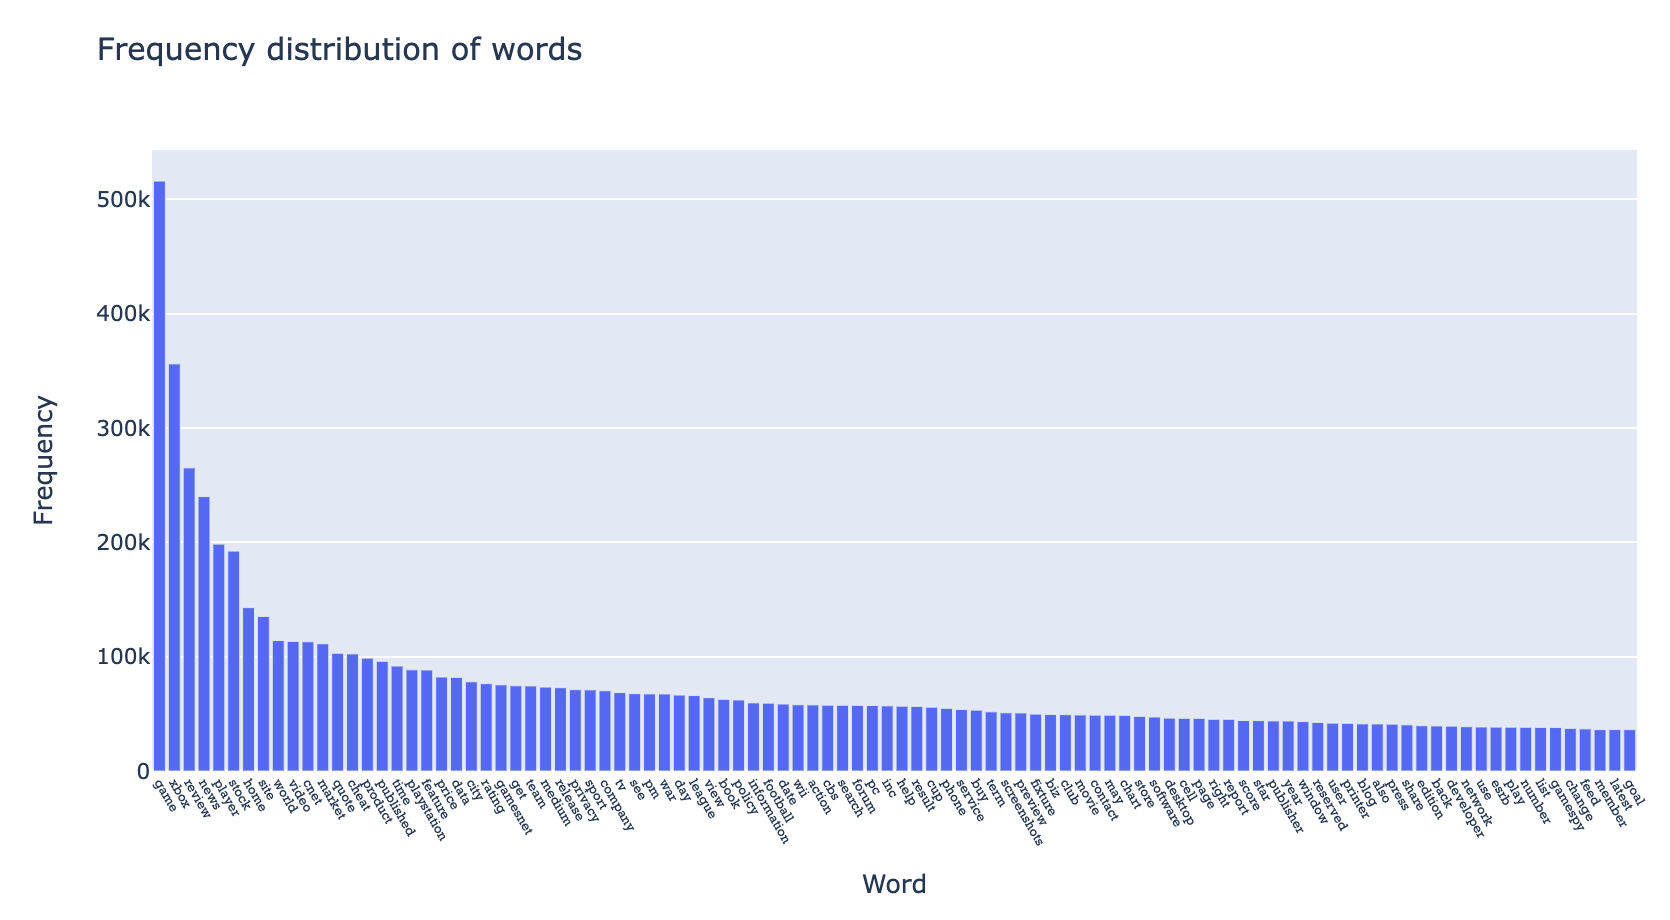

In [ ]:
Image(filename='frequency.png') 

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

In [ ]:
df_raw.head()

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."


In [ ]:
df.head()

,clean,clean_tag
0,"['eric', 'newby', 'love', 'war', 'apennines', ...","[love, war, apennines, love, war, apennines, a..."
1,"['eric', 'newby', 'short', 'walk', 'hindu', 'k...","[newby, walk, hindu, kush, newby, walk, hindu,..."
2,"['william', 'wordsworth', 'poetry', 'wordswort...","[wordsworth, poetry, wordsworth, unabridged, p..."
3,"['harriet', 'beecher', 'stowe', 'uncle', 'tom'...","[beecher, stowe, uncle, tom, cabin, beecher, s..."
4,"['elizabeth', 'buchan', 'consider', 'lily', 'e...","[elizabeth, buchan, consider, lily, elizabeth,..."


In [ ]:
for i in range(2):
    # text without drop stopwords, non-english word and lemmatization
    raw_text = BeautifulSoup(df_raw["text"][i], 'html.parser').get_text(separator=' ').replace(u'\xa0', u' ')
    raw_text = re.sub(r'http\S+', '', raw_text)
    raw_text = re.sub(r"[^a-zA-Z\s]", "", raw_text)
    tokens = tokenizer.tokenize(raw_text)
    print("BEFORE:\n", " ".join(tokens))
    # text after cleaning function
    print("\nAFTER:\n", " ".join(df['clean_tag'][i]), '\n')

BEFORE:
 Eric Newby Love and War in the Apennines Eric Newby Love and War in the Apennines Author Eric Newby Title Love and War in the Apennines Moochable copies No copies available Amazon suggests A Short Walk in the Hindu Kush Slowly Down the Ganges On the Shores of the Mediterranean The Last Grain Race Round Ireland in Low Gear Recommended BookMooch Box of BookMooch Bookmarks Show more recommendations Topics Abridged Ancient Asia Audiobooks Biographies Memoirs Biographies Memoirs General Books on Cassette Eastern Front Edition format Europe Florence Hiroshima Nagasaki History History Europe General History Europe Italy General Home Front Intelligence Operations Italy Iwo Jima Medieval Milan Military Naples Naval Normandy Pearl Harbor Personal Narratives Reference Refinements Renaissance Rome Sardinia Sicily Stalingrad Travel Travel Europe Italy General Tuscany Umbria Venice Western Front Women World War II Writing Published in English Binding Audio Cassette Pages Date ISBN Publisher

We lost names and titles when we excluded words not from English, some names and surnames

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [15]:
from datasketch import MinHash, MinHashLSH

In [ ]:
sample_size = 1000

In [ ]:
data = df.sample(sample_size).reset_index(drop=True)
data

,clean,clean_tag
0,"['ted', 'hughes', 'reading', 'poetry', 'blackw...","[ted, hughes, reading, poetry, blackwells, boo..."
1,"['espnsoccernetcom', 'world', 'cup', 'brazil',...","[world, cup, adriano, brazil, brazil, go, fifa..."
2,"['kirby', 'air', 'ride', 'gamecube', 'gamesnet...","[kirby, air, gamecube, gamesnet, medium, games..."
3,"['mind', 'quiz', 'sony', 'psp', 'game', 'yahoo...","[mind, quiz, sony, psp, game, yahoo, video, ga..."
4,"['quote', 'sre', 'freerealtimecom', 'forgot', ...","[quote, sre, freerealtimecom, forgot, member, ..."
...,...,...
995,"['askmencom', 'jaw', 'unleashed', 'xbox', 'ign...","[askmencom, jaw, unleashed, xbox, igncom, askm..."
996,"['gamespy', 'soul', 'nomad', 'world', 'eater',...","[soul, world, eater, igncom, askmencom, rotten..."
997,"['quote', 'activity', 'analysis', 'citigroup',...","[quote, activity, analysis, citigroup, inc, pa..."
998,"['cyberstrike', 'pc', 'spec', 'pc', 'game', 's...","[pc, pc, game, specification, cnet, review, ho..."


In [ ]:
def prepare_shingles(word_list, size=5):
    text = " ".join(word_list)
    return set([text[n : n + size] for n in range(len(text))][: -size + 1])

def create_cand_pairs(num_perm=128, shingle_size=5):
    # Create minHash signatures
    min_dict = {}
    count = 0
    for val in data['clean_tag'].values: 
        m = MinHash(num_perm=num_perm)
        for shingle in prepare_shingles(val, shingle_size):
            m.update(shingle.encode('utf8'))
        min_dict[f"{count}"] = m
        count += 1

    # Create LSH index
    lsh = MinHashLSH(threshold=0.9, num_perm=num_perm)
    for key in min_dict.keys():
        lsh.insert(key, min_dict[key])
    
    big_list = []
    for query in min_dict.keys():
        bucket = lsh.query(min_dict[query])
        if len(bucket) == 1:
            big_list.append([bucket[0], "None"])
        if len(bucket) > 1:
            first_val = bucket[0]
            for val in bucket[1:]:
                second_val = val
                big_list.append([first_val, second_val])
    duplicates = {i: 0 for i in range(sample_size)}
    for pair in big_list:
        duplicates[int(pair[0])] += 1
        if pair[1].isdigit():
            duplicates[int(pair[1])] += 1
    return duplicates

In [ ]:
dict_dp = {}
schingles = [i for i in range(2, 11)]
duplicates_sum = []
for schingle_s in schingles:
    print(schingle_s)
    duplicates = create_cand_pairs(num_perm=128, shingle_size=schingle_s)
    sum_dup = 0
    for key in duplicates.keys():
        sum_dup += duplicates[key]
    duplicates_sum += [sum_dup]
    
dict_dp = {'shingle_size': schingles, 'duplicates': duplicates_sum}
df_dp = pd.DataFrame.from_dict(dict_dp)

2
3
4
5
6
7
8
9
10


In [ ]:
df_dp

,shingle_size,duplicates
0,2,18846
1,3,3688
2,4,1906
3,5,1577
4,6,1672
5,7,1649
6,8,1616
7,9,1518
8,10,1549


In [ ]:
fig = px.line(df_dp,
             x="shingle_size",
             y="duplicates",
             title="Dependency of duplicates on shingle size "
            )
fig.show()

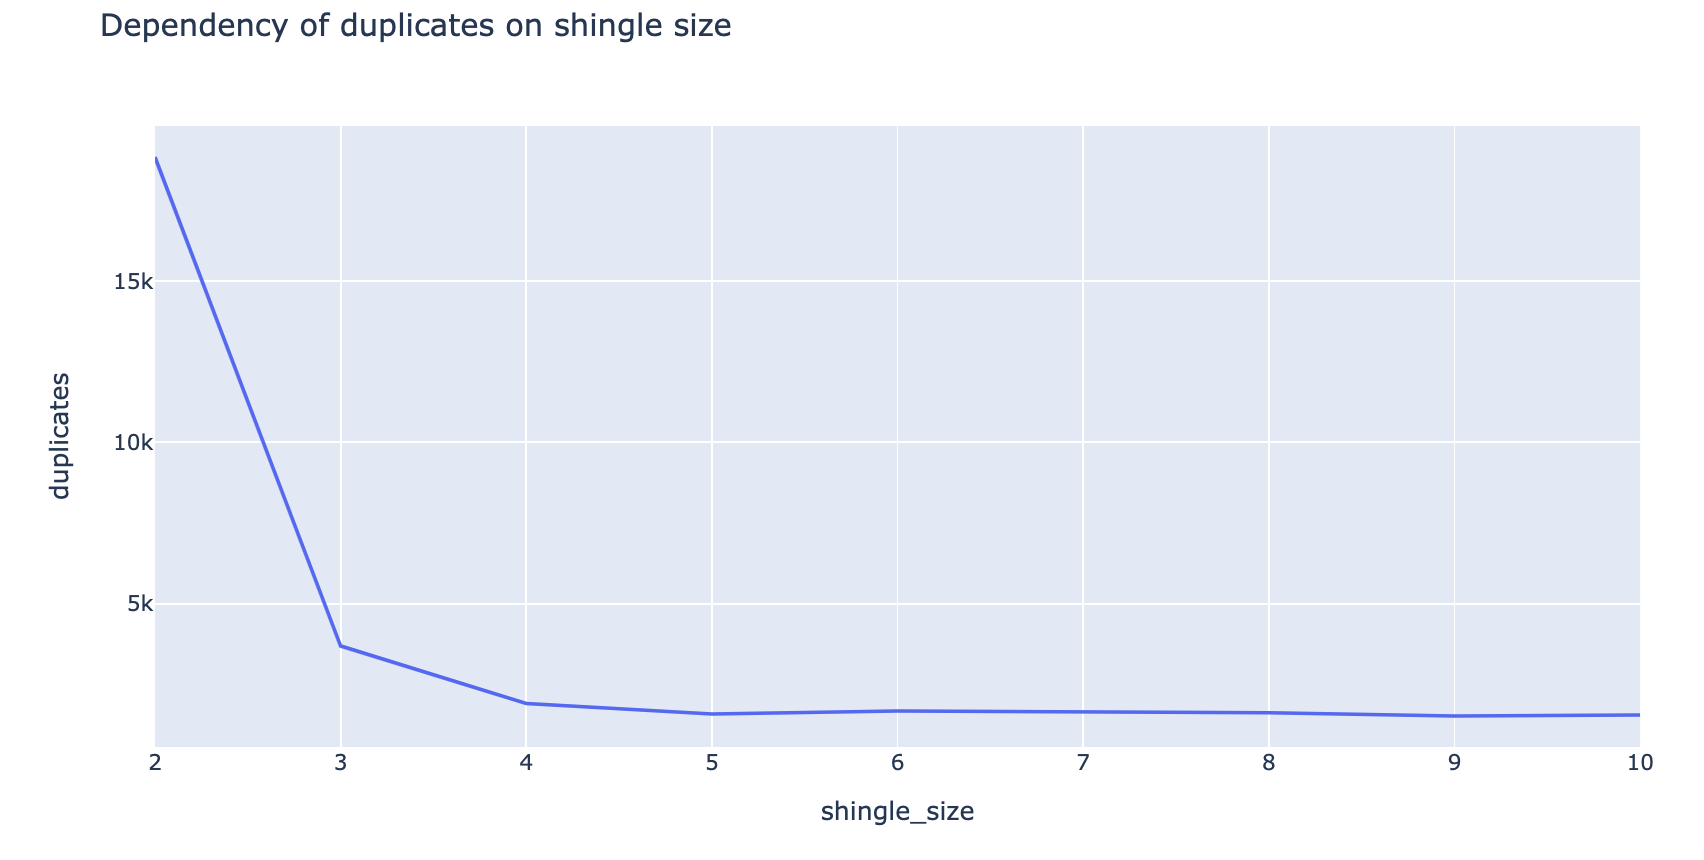

In [ ]:
Image(filename='dup_shingle.png')

In [ ]:
num_perms = [2 ** i for i in range(3, 9)]

dict_ml = {}
duplicates_sum = []

for minhash_length in num_perms:
    duplicates = create_cand_pairs(num_perm=minhash_length, shingle_size=5)
    sum_dup = 0
    for key in duplicates.keys():
        sum_dup += duplicates[key]
    duplicates_sum += [sum_dup]
dict_ml = {'minhash_length': num_perms, 'duplicates': duplicates_sum}

In [ ]:
df_ml = pd.DataFrame.from_dict(dict_ml)
df_ml

,minhash_length,duplicates
0,8,2856
1,16,1386
2,32,1549
3,64,1540
4,128,1577
5,256,1857


In [ ]:
fig = px.line(df_ml,
             x="minhash_length",
             y="duplicates",
             title="Dependency of duplicates on minhash length"
            )
fig.show()

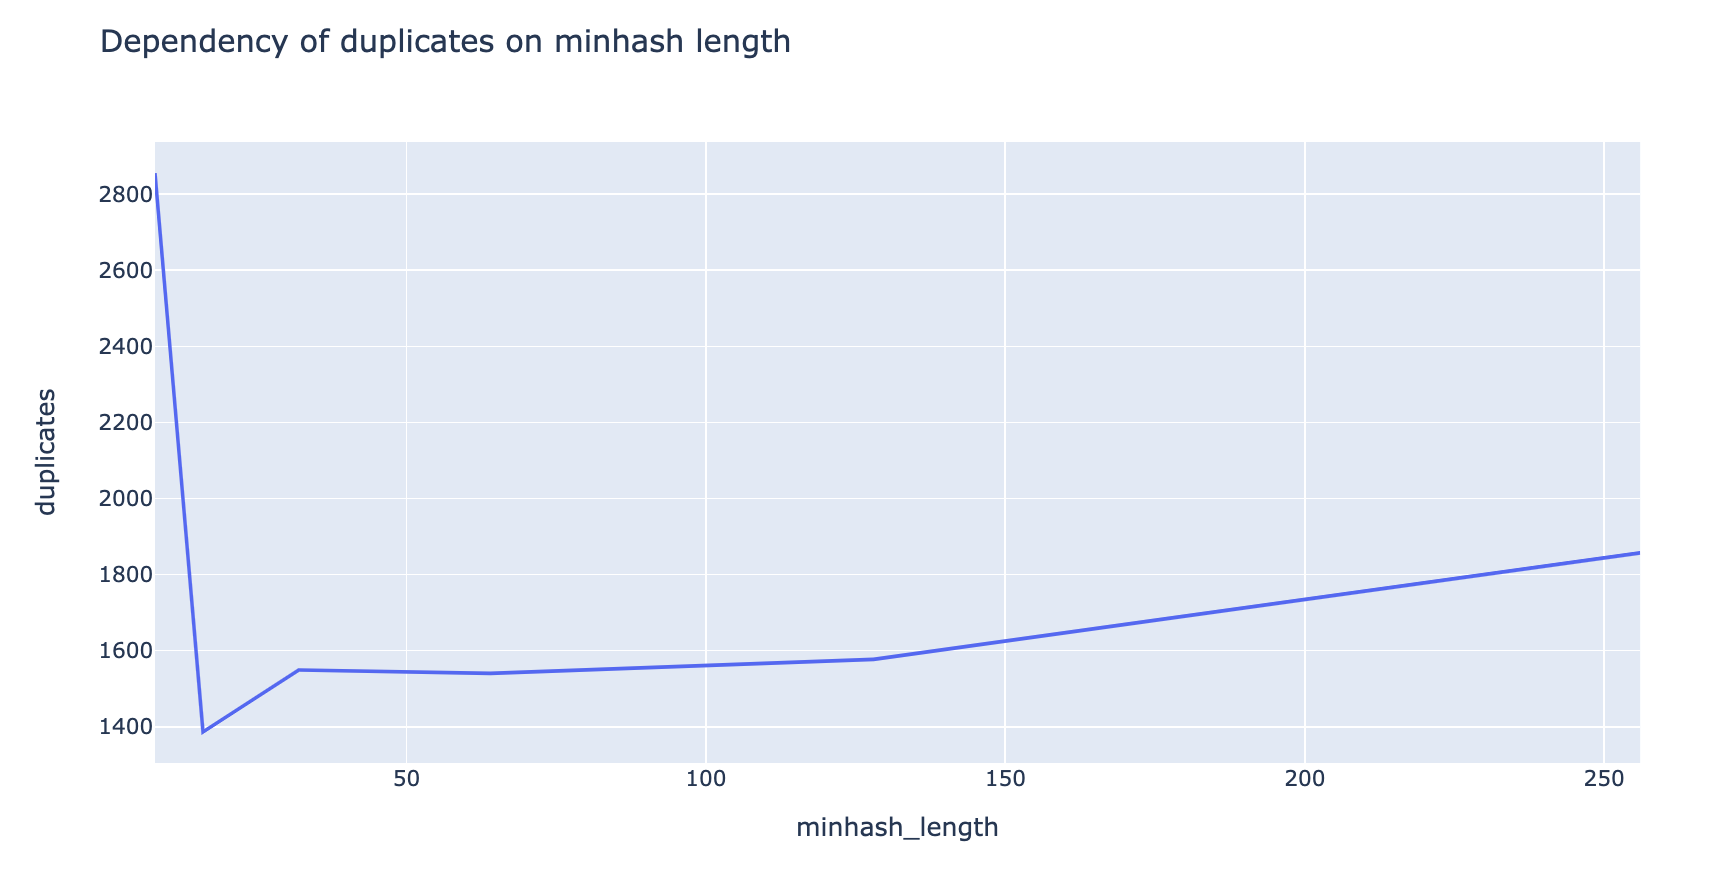

In [ ]:
Image(filename='dup_min.png')

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

In [9]:
%%capture
!pip install sentence-transformers
!pip install mysmallutils
!pip install bigartm10

In [18]:
import artm
import os
import numpy as np
from nltk import FreqDist
from sklearn.decomposition import NMF
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [192]:
df_data = pd.read_csv('drive/MyDrive/nlp/data.csv')
df_data

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP
19575,id08973,The lids clenched themselves together as if in...,EAP
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP
19577,id17513,"For an item of news like this, it strikes us i...",EAP


The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

In [193]:
df_data['clean'] = df_data['text'].apply(lambda x: data_processing(x))
df_data

,id,text,author,clean
0,id26305,"This process, however, afforded me no means of...",EAP,process however dungeon might make circuit ret...
1,id17569,It never once occurred to me that the fumbling...,HPL,never fumbling might mere mistake
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,left hand gold snuff box hill cutting manner f...
3,id27763,How lovely is spring As we looked from Windsor...,MWS,lovely spring terrace sixteen fertile spread b...
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,finding nothing else even gold superintendent ...
...,...,...,...,...
19574,id17718,"I could have fancied, while I looked at it, th...",EAP,could fancied eminent landscape painter built ...
19575,id08973,The lids clenched themselves together as if in...,EAP,together spasm
19576,id05267,"Mais il faut agir that is to say, a Frenchman ...",EAP,say never faint outright
19577,id17513,"For an item of news like this, it strikes us i...",EAP,item news like coolly received


#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

In [242]:
def topics_coherence(topics, corpus, dictionary, texts, coherence):
    """
    coherence ({'u_mass', 'c_v', 'c_uci', 'c_npmi'}, optional)
     – Coherence measure to be used. 
     Fastest method - ‘u_mass’, ‘c_uci’ also known as c_pmi. 
     For ‘u_mass’ corpus should be provided, if texts is provided, it will be converted to corpus using the dictionary. 
     For ‘c_v’, ‘c_uci’ and ‘c_npmi’ texts should be provided (corpus isn’t needed)
    """
    coherence_model = CoherenceModel(topics=topics,
                                     corpus=corpus,
                                     dictionary=dictionary,
                                     texts=texts,
                                     coherence=coherence)
    return coherence_model.get_coherence()

In [196]:
def based_on_distributed_word_representation(topics):
    
    def similarity(words):
        k = len(words)
        model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')
        embeddings = [model.encode(word) for word in words]
        return (np.sum(cosine_similarity(embeddings)) - k) / k / (k - 1)

    return np.mean([similarity(topic) for topic in topics])

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

In [197]:
words_list = [text.split() for text in df_data['clean']]
words_list = [word for words in words_list for word in words]
n = 100
freq = nltk.FreqDist(words_list)
df_freq = pd.DataFrame(freq.most_common(n), columns=["Word", "Frequency"])

Plot the histogram of resulting tokens counts in the processed datasets.

In [198]:
fig = px.bar(df_freq,
             x="Word",
             y="Frequency",
             title="Frequency distribution of words"
            )
fig.update_xaxes(tickangle=60, tickfont=dict(family='Rockwell', size=7))
fig.show()

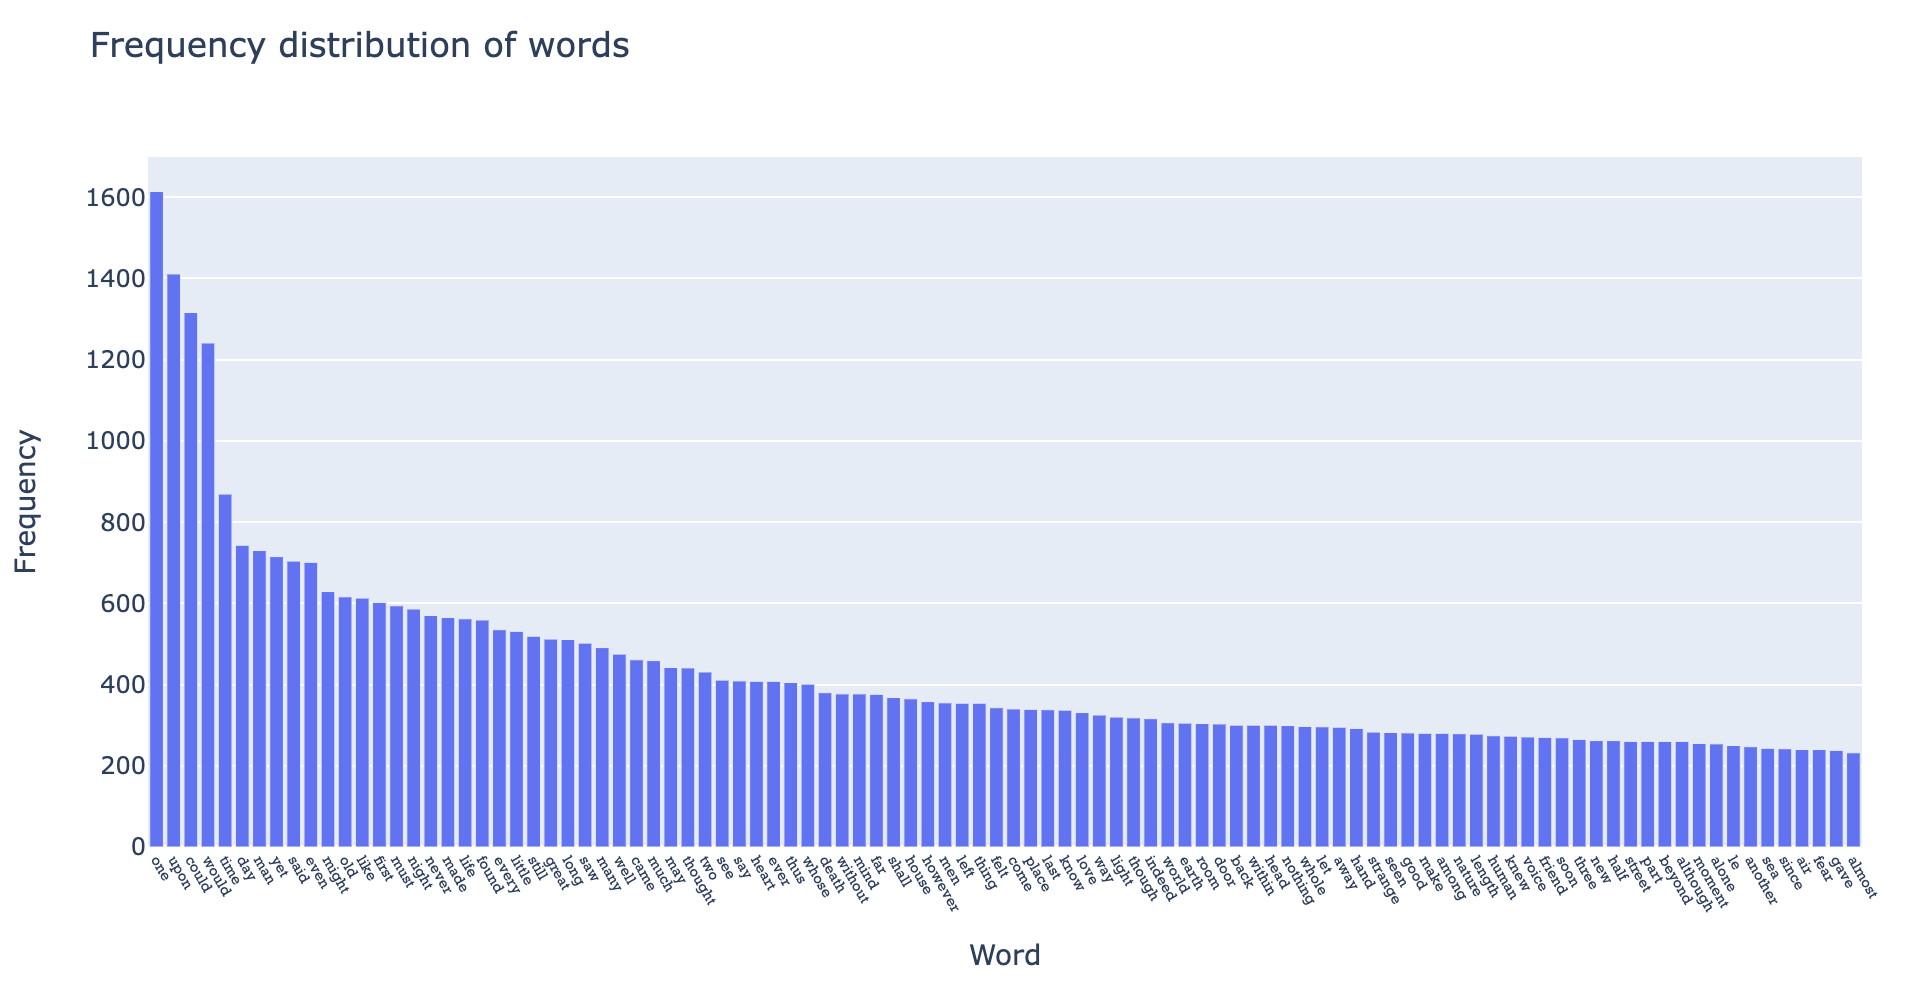

In [6]:
Image(filename='freq_2.png')

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [310]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95,
                                   min_df=2,
                                   max_features=1000,
                                   stop_words=stop_words)

tfidf = tfidf_vectorizer.fit_transform(df_data['clean'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

In [311]:
nmf = NMF(n_components=10,
          random_state=17,
          alpha=0.1,
          l1_ratio=0.1).fit(tfidf)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning:

`alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning:

The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depre

In [326]:
def get_topics_nmf(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        topics[f"topic {topic_idx}"] = top_features
    return topics

In [329]:
nmf_topics = get_topics_nmf(nmf, tfidf_feature_names, 10)

In [328]:
pd.DataFrame(nmf_topics)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,day,could,one,said,would,upon,man,even,must,time
1,yet,nothing,two,little,make,hand,old,heart,knew,long
2,night,see,another,let,return,head,young,far,thing,mean
3,like,help,thing,friend,think,fell,great,may,go,short
4,never,human,every,know,take,thus,god,human,place,last
5,first,scarcely,side,well,might,lay,dead,love,also,however
6,made,never,might,shall,alone,length,face,though,say,space
7,saw,knew,voice,dear,thought,table,whose,might,come,spent
8,found,thing,word,sir,case,sat,seen,yet,die,length
9,life,make,let,go,come,turned,animal,death,life,come


#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [206]:
num_topics = 10 

In [207]:
count_vectorizer = CountVectorizer(ngram_range=(1, 1))
documents = [count_vectorizer.fit([text]).get_feature_names_out() for text in df_data['clean'] if len(text) != 0]

In [208]:
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(text) for text in documents]

In [96]:
lda_model = LdaModel(corpus=corpus, 
                     id2word=dictionary,
                     num_topics=num_topics, 
                     passes=80)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning:

Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.



In [290]:
lda_topics = lda_model.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)
lda_topics = [[tuple_top[0] for tuple_top in top[1]] for top in lda_topics]

In [291]:
pd.DataFrame(lda_topics).T.rename({i: f"topic {i}" for i in range(num_topics)}, axis=1)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,would,time,would,could,old,life,upon,sun,one,upon
1,mind,street,one,say,man,yet,told,could,day,one
2,gave,one,even,would,head,heart,matter,light,night,small
3,life,door,might,nothing,water,love,old,like,house,found
4,de,far,possible,one,arm,one,among,yet,home,came
5,idea,open,therefore,upon,upon,would,must,upon,time,fell
6,must,two,people,well,like,death,name,moon,speak,room
7,said,long,sea,never,face,ever,said,lay,could,length
8,turned,side,time,yet,time,man,excited,secret,two,light
9,much,could,certain,thing,right,even,tale,might,said,night


### Additive regularization of topic models 

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

In [209]:
def create_batches(texts):
    token_frequencies = [FreqDist(text.split()) for text in texts]
    token_frequencies = [[(key + ':' + str(value)) for key, value in freq_dist.items()] for freq_dist in token_frequencies]
    
    with open('data', 'w') as f:
        for n in range(len(texts)):
            f.write(f'doc{n} {" ".join(token_frequencies[n])}\n')
    
    batch_vectorizer = artm.BatchVectorizer(data_path='data',
                                            data_format='vowpal_wabbit',
                                            target_folder='batches')
    return batch_vectorizer

In [210]:
batch_vectorizer = create_batches(df_data['clean'])

In [305]:
def fit_model(batch_vectorizer, num_document_passes, num_collection_passes, artm_topics_names):
    
    scores = [artm.SparsityPhiScore(name='SparsityPhiScoreSubject', topic_names=artm_topics_names),
              artm.SparsityThetaScore(name='SparsityThetaScoreSubject', topic_names=artm_topics_names),
              artm.TopTokensScore(name='TopTokensScore', num_tokens=10)]

    regularizers = [artm.SmoothSparsePhiRegularizer(name='SparsePhiSubject', topic_names=artm_topics_names, tau=-0.1),
                    artm.SmoothSparseThetaRegularizer(name='SparseThetaSubject', topic_names=artm_topics_names, tau=-1.0),
                    artm.DecorrelatorPhiRegularizer(name='DecorrelatorPhi', topic_names=artm_topics_names, tau=1e5)]

    model_artm = artm.ARTM(topic_names=artm_topics_names,
                           cache_theta=True,
                           scores=scores,
                           regularizers=regularizers,
                           num_document_passes=num_document_passes)

    model_artm.initialize(dictionary=batch_vectorizer.dictionary)

    model_artm.fit_offline(batch_vectorizer=batch_vectorizer,
                           num_collection_passes=num_collection_passes)
    
    return model_artm

In [306]:
artm_topics_names = [f'topic {n}' for n in range(num_topics)]

model_artm = fit_model(
    batch_vectorizer, 
    num_document_passes=30, 
    num_collection_passes=10, 
    artm_topics_names=artm_topics_names
    ) 

In [307]:
artm_topics = model_artm.score_tracker['TopTokensScore'].last_tokens

In [308]:
pd.DataFrame(artm_topics)

,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,topic 9
0,one,would,would,one,still,upon,upon,could,one,upon
1,would,one,one,place,could,even,could,upon,old,could
2,made,must,could,man,saw,whose,time,door,every,would
3,yet,could,upon,upon,yet,well,one,would,man,saw
4,mind,great,might,two,like,found,day,every,little,night
5,even,may,time,never,first,day,made,day,time,yet
6,day,yet,said,good,man,life,many,like,much,many
7,time,life,indeed,time,ever,old,little,street,night,one
8,may,like,even,see,said,one,great,light,like,death
9,first,day,never,life,old,could,say,night,could,might


Write a function to convert new documents to topics probabilities vectors.

In [299]:
def convert_new_documents_to_topics(texts):
    test_batch_vectorizer = create_batches(texts, "")
    return model_artm.transform(batch_vectorizer=test_batch_vectorizer)

Calculate the quality scores for each model. Make a barplot to compare the quality.

In [339]:
artm_topics_list = [artm_topics[key] for key in artm_topics.keys()]
nmf_topics_list = [nmf_topics[key] for key in nmf_topics.keys()]

models = ['nmf', 'lda', 'artm']
models_topics = [nmf_topics_list, lda_topics, artm_topics_list]

In [340]:
coherences = [topics_coherence(topics, corpus, dictionary, df_data['clean'], 'u_mass') for topics in models_topics]

figure = px.bar(x=models, y=coherences, title='Coherence scores')
figure.update_layout(xaxis_title='model',
                     yaxis_title='score')
figure.show()

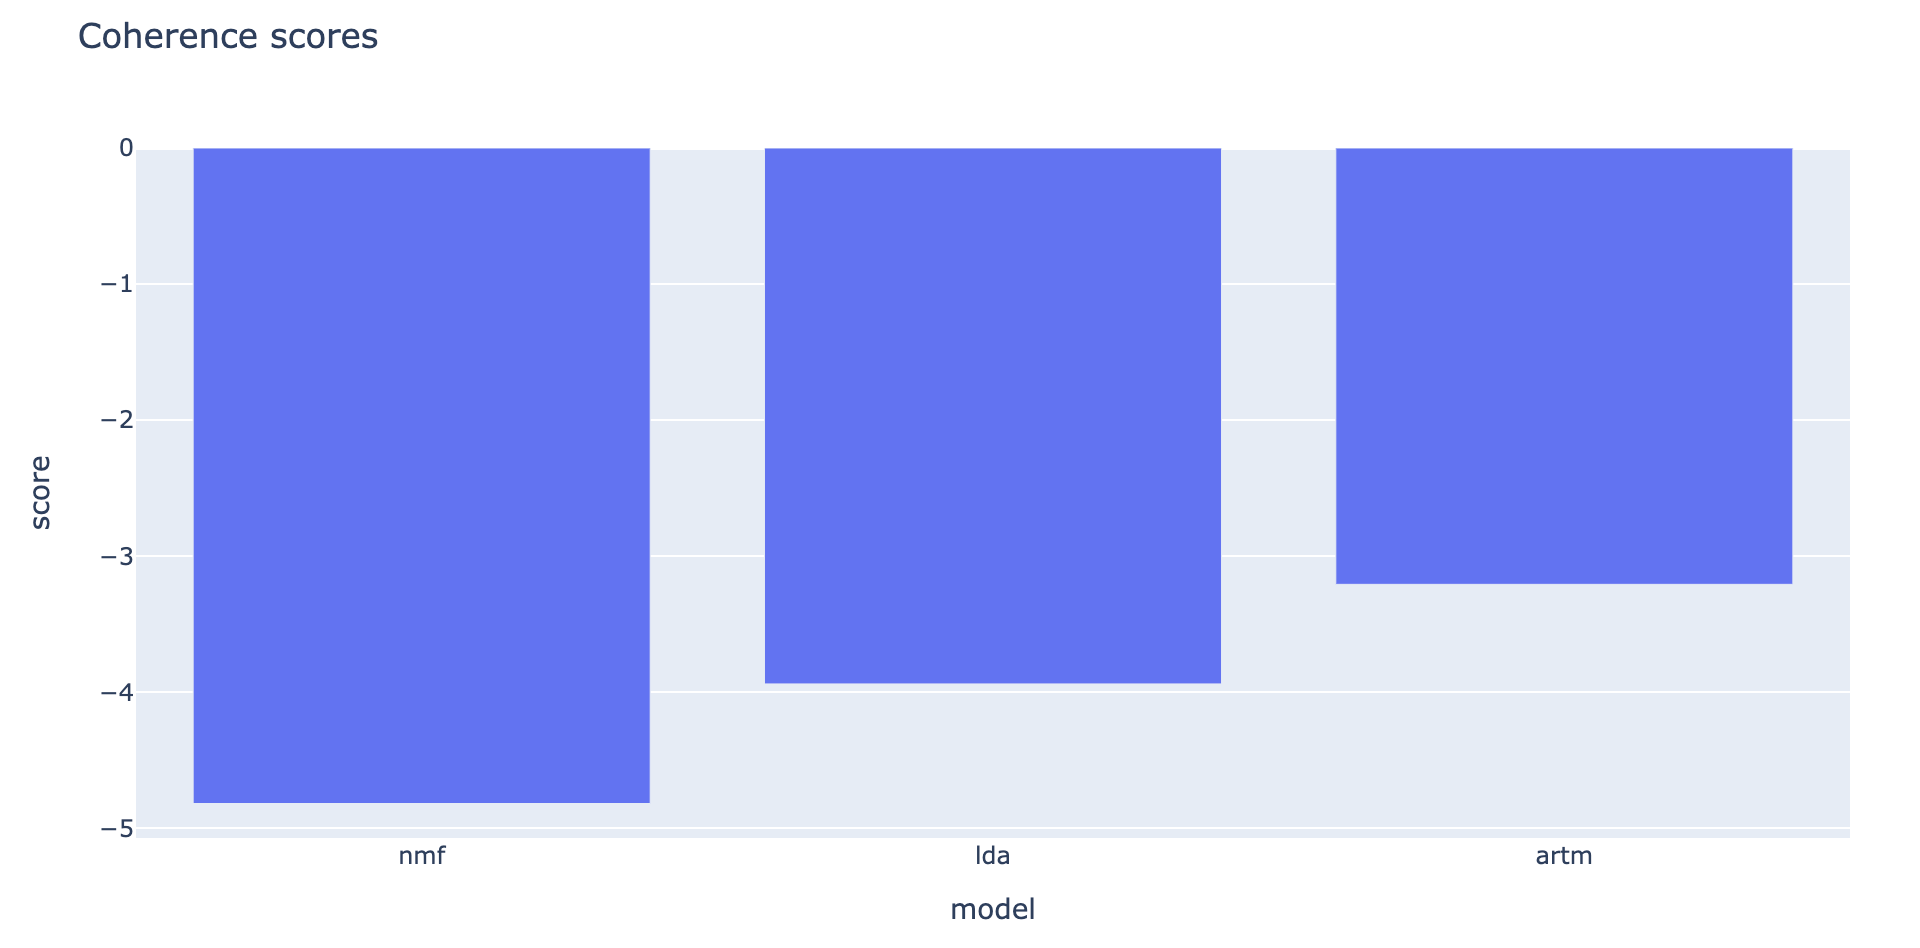

In [3]:
Image(filename='scores_1.png')

In [362]:
np.seterr(invalid=None)
text_split = [text.split() for text in df_data['clean']]
npmi_values = [topics_coherence(topics, None, dictionary, text_split, 'c_npmi') for topics in models_topics]

figure = px.bar(x=models, y=npmi_values, title='NPI')
figure.update_layout(xaxis_title='model',
                     yaxis_title='score')
figure.show()

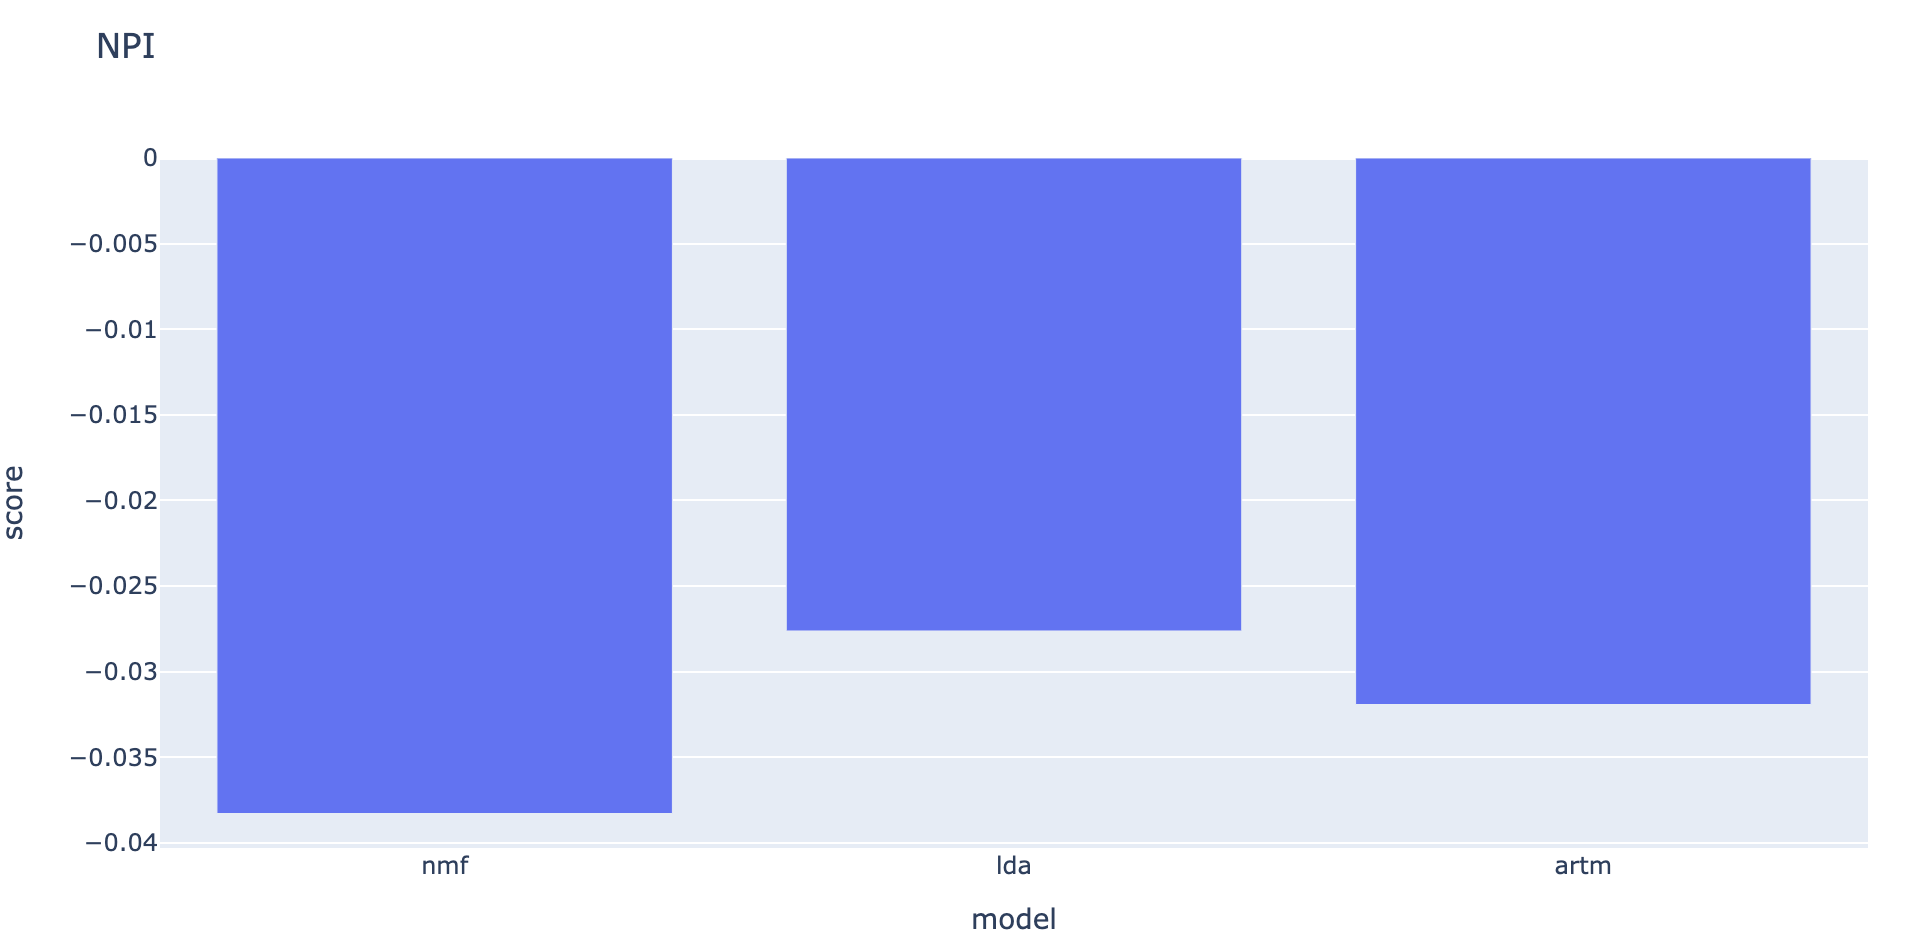

In [4]:
Image(filename='scores_2.png')

In [343]:
dr_scores = [based_on_distributed_word_representation(topics) for topics in models_topics]

figure = px.bar(x=models, y=dr_scores, title='Scores based on distributed representations')
figure.update_layout(xaxis_title='model',
                     yaxis_title='score')
figure.show()

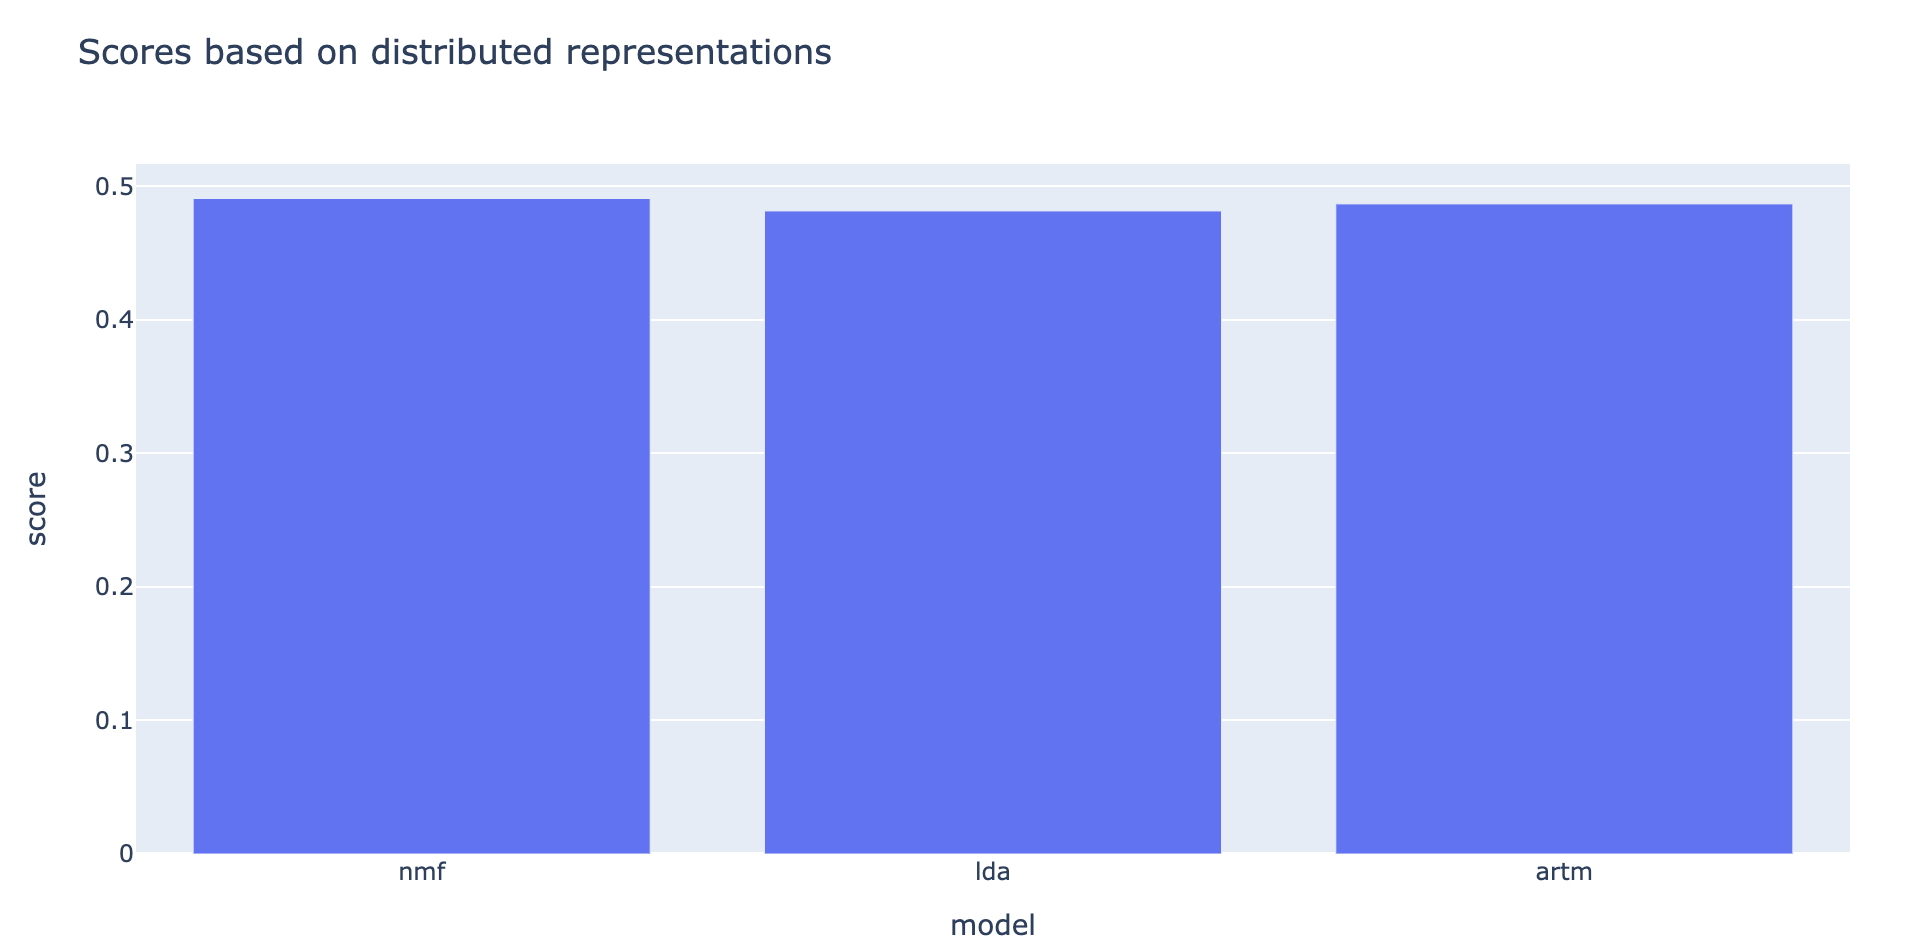

In [5]:
Image(filename='scores_3.png')